# <center>**cs512 f24 - assignment 1 (image formation)**</center>

### <div style="text-align: right"> Seonghwan Lim &nbsp;&nbsp; </div>
### <div style="text-align: right"> A20586593 &nbsp;&nbsp; </div>

---
#### **1. Homogeneous Coordinates Representation (2D)**: Let $x = (2, 3)$ be a point in 2D Cartesian coordinates.
- Convert the point $x$ into homogeneous coordinates $x_{H_o}$
- Find another point in 2D homogeneous coordinates that is equivalent to the same point $x$ (use a different scale).
- Convert both homogeneous coordinates back to Cartesian coordinates and verify they represent the same point.

In [1]:
import numpy as np

# Create a point x
x = np.array([2, 3])
print(f'Point x: {x}\n')

# Convert to homogeneous coordinates
x_Ho = np.append(x, [1])
print(f'Homogeneous coordinates x_Ho: {x_Ho}\n')

# By Scaling a scalar k, create andother point in 2D homogeneous coordinates
k = 2.
x_Ho_diff = k * x_Ho
print(f'Another homogeneous coordinate x_Ho: {x_Ho_diff}\n')

# Convert both homogeneous coordinates back to Cartesian coordinates and verify
x_Ho_toCartesian = x_Ho / x_Ho[-1]
x_Ho_diff_toCartesian = x_Ho_diff / x_Ho_diff[-1]
print(f'Both homogeneous coordinates {x_Ho_toCartesian} and {x_Ho_diff_toCartesian} are same')

Point x: [2 3]

Homogeneous coordinates x_Ho: [2 3 1]

Another homogeneous coordinate x_Ho: [4. 6. 2.]

Both homogeneous coordinates [2. 3. 1.] and [2. 3. 1.] are same


---
#### **2. Homogeneous Coordinates Representation (3D)**: Let $y = ( 4, 5, 6)$ be a point in 3D Cartesian coordinates.
- Convert $y$ to its homogeneous coordinates representation.
- Now, consider the homogeneous point $y_H = ( 4, 5, 6, 1 )$. Scale it by a factor of 2 and convert back to Cartesian coordinates.
- Verify the result matches the original point $y$.

In [2]:
import numpy as np

# Create a point y
y = np.array([4, 5, 6])
print(f'Point y: {y}\n')

# Convert to homogeneous coordinates
y_Ho = np.append(y, [1])
print(f'Homogeneous coordinates y_Ho: {y_Ho}\n')

# Create a homogeneous point y_H
y_H = np.array([4, 5, 6, 1])
print(f'Homogeneous coordinates y_H: {y_H}\n')

# Scale the point y_H by a factor of 2
y_H_scale = 2 * y_H

# Convert back to Cartesian coordinates
y_H_scale_toCartesian = y_H_scale / y_H_scale[-1]
y_H_scale_toCartesian = y_H_scale_toCartesian[:-1]
print(f'Convert back scaled homogeneous point y_H to the Cartesian coordinates {y_H_scale_toCartesian}\n')

# Verify the result matches the original point y
print(f'Both Cartesian coordinates {y} and {y_H_scale_toCartesian} are same')

Point y: [4 5 6]

Homogeneous coordinates y_Ho: [4 5 6 1]

Homogeneous coordinates y_H: [4 5 6 1]

Convert back scaled homogeneous point y_H to the Cartesian coordinates [4. 5. 6.]

Both Cartesian coordinates [4 5 6] and [4. 5. 6.] are same


---
#### **3. Affine Transformations in 2D**: Given a point $p = (1, 2)$ in 2D, apply the following transformations in the specified order:
- Scale by a factor of $3$.
- Rotate counterclockwise by $45°$.
- Translate by $(2, 3)$.

Compute the transformation matrix in homogeneous coordinates for each step. Then, apply
the combined transformation to the point $p$ . Finally, verify your result by applying the
transformations using NumPy.

In [3]:
import numpy as np

# Create a point p
p = np.array([1, 2])
print(f'Point p: {p}\n')

# Convert to homogeneous coordinates
p_Ho = np.append(p, [1])
print(f'Homogeneous coordinate p_Ho: {p_Ho}\n')

# Create scale by a factor of 3 matrix
scale_matrix = np.array([
    [3, 0, 0],
    [0, 3, 0],
    [0, 0, 1]
])
print(f'Scale by a factor of 3 matrix: \n{scale_matrix}\n')

# Create rotate counterclockwise by 45° matrix
theta = np.radians(45)
rotate_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])
print(f'Rotate counterclockwise by 45° matrix: \n{rotate_matrix}\n')

# Create translate by (2, 3) matrix
translate_matrix = np.array([
    [1, 0, 2],
    [0, 1, 3],
    [0, 0, 1]
])
print(f'Translate by (2, 3) matrix: \n{translate_matrix}\n')

# Combined transformation matrix T @ R @ S
transformation_matrix = translate_matrix @ rotate_matrix @ scale_matrix
print(f'Combined tranformation: \n{transformation_matrix}\n')

# Apply the combined transformation to the point p_Ho
p_Ho_transformed = transformation_matrix @ p_Ho.reshape(3, 1)
print(f'Apply the combined transformation to the point p_Ho: {np.squeeze(p_Ho_transformed.reshape(1, 3))}\n')

# Convert homogeneous coordinates back to Cartesian coordinates
p_transformed = np.squeeze(p_Ho_transformed.reshape(1, 3)) / np.squeeze(p_Ho_transformed.reshape(1, 3))[-1]
print(f'Convert homogeneous coordinates back to Cartesian coordinates: {p_transformed[:-1]}')

Point p: [1 2]

Homogeneous coordinate p_Ho: [1 2 1]

Scale by a factor of 3 matrix: 
[[3 0 0]
 [0 3 0]
 [0 0 1]]

Rotate counterclockwise by 45° matrix: 
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

Translate by (2, 3) matrix: 
[[1 0 2]
 [0 1 3]
 [0 0 1]]

Combined tranformation: 
[[ 2.12132034 -2.12132034  2.        ]
 [ 2.12132034  2.12132034  3.        ]
 [ 0.          0.          1.        ]]

Apply the combined transformation to the point p_Ho: [-0.12132034  9.36396103  1.        ]

Convert homogeneous coordinates back to Cartesian coordinates: [-0.12132034  9.36396103]


---
#### **4. Inverse Transformations (2D)**: Let $q = (3, 4)$ be a point in 2D, and assume the following transformations have been applied: 
- Scale by $2$. 
- Rotate by $30°$. 
- Translate by $(5, 5)$.

Compute the matrix that reverses these transformations. Apply the inverse matrix to return $q$ to its original position. Verify the result using NumPy. 

In [4]:
import numpy as np

# Create a point q
q = np.array([3, 4])
print(f'Point q: {q}\n')

# Convert to homogeneous coordinates
q_H = np.append(q, [1])
print(f'Homogeneous coordiates q_H: {q_H}\n')

# Inverse scale by 2 matrix
inv_scale = np.array([
    [1 / 2, 0, 0],
    [0, 1 / 2, 0],
    [0, 0, 1]
])
print(f'Inverse scale by 2 matrix: \n{inv_scale}\n')

# Inverse rotate by 30° matrix
theta = np.radians(30)
inv_rotate = np.array([
    [np.cos(-theta), -np.sin(-theta), 0],
    [np.sin(-theta), np.cos(-theta), 0],
    [0, 0, 1]
])
print(f'Inverse rotate by 30° matrix: \n{inv_rotate}\n')

# Inverse Translate by (5, 5) matrix
inv_translate = np.array([
    [1, 0, - 5],
    [0, 1, - 5],
    [0, 0, 1]
])
print(f'Inverse Translate by (5, 5) matrix: \n{inv_translate}\n')

# Apply the inverse matrix to return q_H to its original position q_o_H
# q_H = T @ R @ S @ q_o_H
# q_o_H = S^-1 @ R^-1 @ T^-1 @ q_H
q_o_H = inv_scale @ inv_rotate @ inv_translate @ q_H.reshape(3, 1)
print(f'Original position q_o_H: {np.squeeze(q_o_H.reshape(1, 3))}\n')

# Original position q_o
q_o = np.squeeze(q_o_H[:-1].reshape(1, 2))
print(f'Original position q_o: {q_o}')

Point q: [3 4]

Homogeneous coordiates q_H: [3 4 1]

Inverse scale by 2 matrix: 
[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]

Inverse rotate by 30° matrix: 
[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]

Inverse Translate by (5, 5) matrix: 
[[ 1  0 -5]
 [ 0  1 -5]
 [ 0  0  1]]

Original position q_o_H: [-1.1160254  0.0669873  1.       ]

Original position q_o: [-1.1160254  0.0669873]


---
#### **5. Transformations Between 3D Coordinate Systems**: Consider two 3D coordinate systems:
-  System A has its origin at $(1, 1, 1)$ and is aligned with the world axes.
- System B has its origin at $(2, 2, 2)$ and is rotated by $90°$ around the Z-axis.

A point $r = (3, 3, 3)$ is given in System A. Compute the transformation matrix to convert this point to System B's coordinates and apply it to $r$.

In [5]:
import numpy as np

# Create System A and B origin
a_origin = np.array([1, 1, 1])
b_origin = np.array([2, 2, 2])
print(f'System A origin: {a_origin}\nSystem B origin: {b_origin}\n')

# Inverse translate matrix
inv_translate = np.array([
    [1, 0, 0, -(b_origin[0] - a_origin[0])],
    [0, 1, 0, -(b_origin[1] - a_origin[1])],
    [0, 0, 1, -(b_origin[2] - a_origin[2])],
    [0, 0, 0, 1]
])
print(f'Inverse translate matrix: \n{inv_translate}\n')

# Inverse rotate matrix
theta = np.radians(90)
inv_rotate = np.array([
    [np.cos(-theta), -np.sin(-theta), 0, 0],
    [np.sin(-theta), np.cos(-theta), 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
# The value 6.123234e-17, which is output for cosine 90°, is almost 0.
print(f'Inverse rotate matrix: \n{inv_rotate}\n')

# Compute transformation matrix A to B coordinates
# M_(b<-a) = R^T @ T(-t)
m_b_a = inv_rotate @ inv_translate
print(f'Transformation matrix A to B coordinates: \n{m_b_a}\n')

# Create point p
r = np.array([3, 3, 3])
print(f'Point r: {r}\n')

# Convert to homogeneous coordinates
r_H = np.append(r, [1])

# Apply transformation matrix
# p^(b) = M_(b<-a) @ p^(a)
r_H_b = m_b_a @ r_H.reshape(4, 1)
r_b = np.squeeze(r_H_b[:-1].reshape(1, 3))
print(f'Apply transformation matrix to point r:{r_b}')

System A origin: [1 1 1]
System B origin: [2 2 2]

Inverse translate matrix: 
[[ 1  0  0 -1]
 [ 0  1  0 -1]
 [ 0  0  1 -1]
 [ 0  0  0  1]]

Inverse rotate matrix: 
[[ 6.123234e-17  1.000000e+00  0.000000e+00  0.000000e+00]
 [-1.000000e+00  6.123234e-17  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]

Transformation matrix A to B coordinates: 
[[ 6.123234e-17  1.000000e+00  0.000000e+00 -1.000000e+00]
 [-1.000000e+00  6.123234e-17  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00 -1.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]

Point r: [3 3 3]

Apply transformation matrix to point r:[ 2. -2.  2.]


---
#### **6. Projection in Camera Coordinates (3D to 2D)**: Let a point in 3D camera coordinates be $P = (1, 2, 5)$. You are given the following camera intrinsic matrix $K^*$:

$$K^* = 
\begin{pmatrix}
1000 & 0 & 500 \\
0 & 1000 & 500 \\
0 & 0 & 1
\end{pmatrix}$$

- Project the point $P$ onto the 2D image plane using the intrinsic matrix $K$ .
- Compute the 2D pixel coordinates of the projected point.
- Explain the meaning for the elements of $K^*$ .

In [6]:
import numpy as np

# Create a point P in 3D camera coordinates
p_3d = np.array([1, 2, 5])
print(f'Point P: {p_3d}\n')

# Convert to homogeneous coordinates
p_3d_H = np.append(p_3d, [1])

# Create intrinsic matrix K*
k = np.array([
    [1000, 0, 500],
    [0, 1000, 500],
    [0, 0, 1]
])

# Create projection matrix from K*
# K*[I|0]
zeros_column = np.zeros((3, 1))
k_I_O = np.hstack((k, zeros_column))
print(f'Projection matrix: \n{k_I_O}\n')

# Project the point P onto the 2D image plane
# p^(i) = K*[I|0] @ P^(c)
p_2d_H = k_I_O @ p_3d_H
print(f'Projected point from the point P: {p_2d_H}\n')

# 2D pixel coordinates of the projected point
p_2d = (p_2d_H / p_2d_H[-1])[:-1]
print(f'2D pixel coordinates of the projected point: {p_2d}')

Point P: [1 2 5]

Projection matrix: 
[[1000.    0.  500.    0.]
 [   0. 1000.  500.    0.]
 [   0.    0.    1.    0.]]

Projected point from the point P: [3500. 4500.    5.]

2D pixel coordinates of the projected point: [700. 900.]


The elements of $K^*$ are internal camera parameters. $K^*$ is define as:

$$K^* =
M_{i \leftarrow c}K =
\begin{bmatrix}
k_{u} & 0 & u_{0} \\
0 & k_{v} & v_{o} \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
f & 0 & 0 \\
0 & f & 0 \\
0 & 0 & 1
\end{bmatrix} = 
\begin{bmatrix}
fk_{u} & 0 & u_{0} \\
0 & fk_{v} & v_{o} \\
0 & 0 & 1
\end{bmatrix} = 
\begin{bmatrix}
1000 & 0 & 500 \\
0 & 1000 & 500 \\
0 & 0 & 1
\end{bmatrix}$$

$f$ is the focal lenghts [mm].

$k_{u}$ and $k_{v}$ are the scale in $x$ and $y$ relating pixels to $mm$ [pixels/mm].

$u_{0}$ and $v_{0}$ are translation of the principal point in $x$ and $y$ [pixels].

---
#### **7. General Camera Model (3D World Points to 2D Image Points)**: Given the following camera parameters:

- Intrinsic matrix $K^*$: $K^* = 
\begin{pmatrix}
1200 & 0 & 640 \\
0 & 1200 & 360 \\
0 & 0 & 1
\end{pmatrix}$
- Camera rotation matrix $R$ = identity matrix.
- Camera translation $t = (0, 0, - 10)$.

Transform a 3D world point $X = (2, 3, 4)$ from world coordinates to 2D image coordinates.
You will need to:
- Compute the extrinsic matrix from the rotation and translation.
- Project the point onto the image plane.
- Verify the 2D coordinates in pixels.

In [7]:
import numpy as np

# Create a 3D world point X
x_w = np.array([2, 3, 4])
print(f'Point X: {x_w}\n')

# Convert to homogeneous coordinates
x_w_H = np.append(x_w, [1])

# Create a intrinsic matrix K*
k = np.array([
    [1200, 0, 640],
    [0, 1200, 360],
    [0, 0, 1]
])
print(f'Intrinsic matrix K*: \n{k}\n')

# Create projection matrix from K*
# K^[I|0]
zeros_column = np.zeros((3, 1))
k_I_O = np.hstack((k, zeros_column))
print(f'Projection matrix: \n{k_I_O}\n')

# Inverse translate matrix
inv_translate = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, -(-10)],
    [0, 0, 0, 1]
])
print(f'Inverse translate matrix: \n{inv_translate}\n')

# Inverse rotate matrix
inv_rotate = np.identity(4)
print(f'Inverse rotate matrix: \n{inv_rotate}\n')

# Compute extrinsic matrix
# M_c<-w
m_c_w = inv_rotate @ inv_translate
print(f'Extrinsic matrix: \n{m_c_w}\n')

# Project the point X onto the 2D image plane
# x^(i) = K*[I|0] @ M_c<-w @ X^(w)
x_i_H = k_I_O @ m_c_w @ x_w_H
print(f'Projected point from the point X: {x_i_H}\n')

# 2D pixel coordinates of the projected point
x_i = x_i_H / x_i_H[-1]
print(f'2D pixel coordinates of the projected point: {x_i[:-1]}')

Point X: [2 3 4]

Intrinsic matrix K*: 
[[1200    0  640]
 [   0 1200  360]
 [   0    0    1]]

Projection matrix: 
[[1.2e+03 0.0e+00 6.4e+02 0.0e+00]
 [0.0e+00 1.2e+03 3.6e+02 0.0e+00]
 [0.0e+00 0.0e+00 1.0e+00 0.0e+00]]

Inverse translate matrix: 
[[ 1  0  0  0]
 [ 0  1  0  0]
 [ 0  0  1 10]
 [ 0  0  0  1]]

Inverse rotate matrix: 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Extrinsic matrix: 
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. 10.]
 [ 0.  0.  0.  1.]]

Projected point from the point X: [11360.  8640.    14.]

2D pixel coordinates of the projected point: [811.42857143 617.14285714]


---
#### **8. Image Transformation using cv2.warpAffine (2D)**: Load an image using OpenCV. 

You will apply a combination of transformations (translation, rotation, and scaling) to the image.
- First, compute the affine transformation matrix manually using translation $(50, 30)$, rotation by $30°$, and scaling by a factor of $1.5$.
- Use OpenCV's ```cv2. warpAffine``` function to apply the transformation to the image.
- Display both the original and transformed images.

The combined matrix: 
[[ 1.29903811  0.75       50.        ]
 [-0.75        1.29903811 30.        ]
 [ 0.          0.          1.        ]]

The combined matrix for cv2.warpAffine: 
[[ 1.29903811  0.75       50.        ]
 [-0.75        1.29903811 30.        ]]



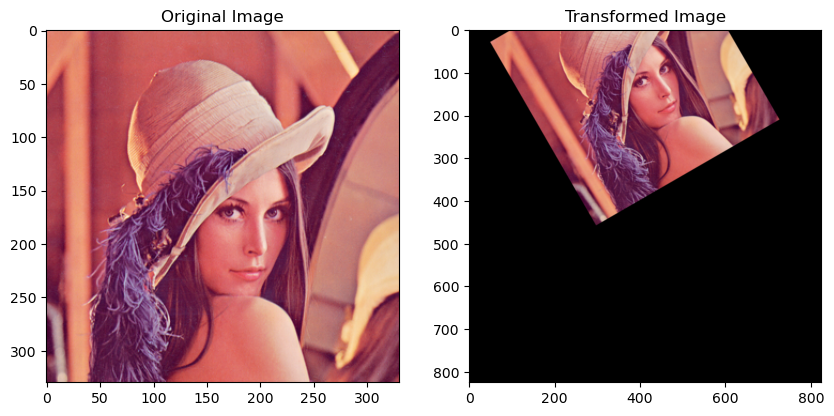

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an image
image = cv2.imread("Lenna.png")

# Create scale by a factor of 1.5 matrix
scale_matrix = np.array([
    [1.5, 0, 0],
    [0, 1.5, 0],
    [0, 0, 1]
])

# Create rotate counterclockwise by 30° matrix
# In the image coordinate, a minus theta means counterclockwise(ccw) rotation
theta = np.radians(-30)
rotate_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# Create translate by (50, 30) matrix
translate_matrix = np.array([
    [1, 0, 50],
    [0, 1, 30],
    [0, 0, 1]
])

# Combined transformation: Scale -> Rotate -> Translate
affine_matrix = translate_matrix @ rotate_matrix @ scale_matrix
print(f'The combined matrix: \n{affine_matrix}\n')
print(f'The combined matrix for cv2.warpAffine: \n{affine_matrix[:-1, :]}\n')

# Image size (height, width)
h, w = image.shape[:2]

# Apply the transformation to the image using cv2.warpAffine
transformed_image = cv2.warpAffine(image, affine_matrix[:-1, :], (int(w * 2.5), int(h * 2.5)))

# Change BGR to RGB for display in matplot
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
transformed_image_rgb = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)

# Display the original, transformed images
plt.figure(figsize = (10 ,5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb, cmap = 'gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(transformed_image_rgb, cmap = 'gray')
plt.title("Transformed Image")
plt.show()

---
#### **9. Order of Transformations**: Let $s$ = $(1, 1)$ be a point in 2D.

- Apply the following transformations in the order specified:

1. Rotate by $90°$.
2. Scale by a factor of 2.
3. Translate by $( - 1, 1 )$.

Now reverse the order of the transformations and apply them again. Observe and explain how the final position of s changes with different transformation orders.

Point s: [1 1]

Homogeneous coordinate s_Ho: [1 1 1]

Rotate counterclockwise by 90° matrix: 
[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]

Scale by a factor of 2 matrix: 
[[2 0 0]
 [0 2 0]
 [0 0 1]]

Translate by (-1, 1) matrix: 
[[ 1  0 -1]
 [ 0  1  1]
 [ 0  0  1]]

Combined tranformation: 
[[ 1.2246468e-16 -2.0000000e+00 -1.0000000e+00]
 [ 2.0000000e+00  1.2246468e-16  1.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]

Reversed combined tranformation: 
[[ 1.2246468e-16 -2.0000000e+00 -2.0000000e+00]
 [ 2.0000000e+00  1.2246468e-16 -2.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  1.0000000e+00]]

Apply the combined transformation to the point p_Ho: [-3.  3.  1.]
Apply the reversed combined transformation to the point p_Ho: [-4.00000000e+00  2.22044605e-16  1.00000000e+00]

Convert homogeneous coordinates back to Cartesian coordinates: [-3.  3.]
Convert reversed homogeneous coordin

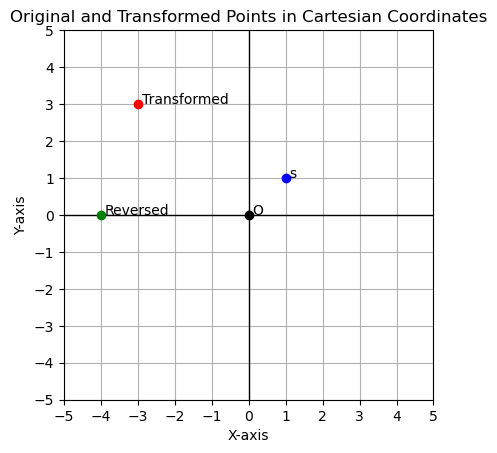

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create a point s
s = np.array([1, 1])
print(f'Point s: {s}\n')

# Convert to homogeneous coordinates
s_Ho = np.append(s, [1])
print(f'Homogeneous coordinate s_Ho: {s_Ho}\n')

# Create rotate counterclockwise by 90° matrix
theta = np.radians(90)
rotate_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])
print(f'Rotate counterclockwise by 90° matrix: \n{rotate_matrix}\n')

# Create scale by a factor of 2 matrix
scale_matrix = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])
print(f'Scale by a factor of 2 matrix: \n{scale_matrix}\n')

# Create translate by (-1, 1) matrix
translate_matrix = np.array([
    [1, 0, -1],
    [0, 1, 1],
    [0, 0, 1]
])
print(f'Translate by (-1, 1) matrix: \n{translate_matrix}\n')

# Combined transformation matrix in the order specified T @ S @ R
transformation_matrix = translate_matrix @ scale_matrix @ rotate_matrix
print(f'Combined tranformation: \n{transformation_matrix}\n')

# Combined transformation matrix in the reversed order R @ S @ T
reversed_transformation_matrix = rotate_matrix @ scale_matrix @ translate_matrix
print(f'Reversed combined tranformation: \n{reversed_transformation_matrix}\n')

# Apply the combined transformation in the order and reversed to the point s_Ho
s_Ho_transformed = transformation_matrix @ s_Ho.reshape(3, 1)
print(f'Apply the combined transformation to the point p_Ho: {np.squeeze(s_Ho_transformed.reshape(1, 3))}')

s_Ho_reversed_transformed = reversed_transformation_matrix @ s_Ho.reshape(3, 1)
print(f'Apply the reversed combined transformation to the point p_Ho: {np.squeeze(s_Ho_reversed_transformed.reshape(1, 3))}\n')

# Convert homogeneous coordinates back to Cartesian coordinates
s_transformed = np.squeeze(s_Ho_transformed.reshape(1, 3)) / np.squeeze(s_Ho_transformed.reshape(1, 3))[-1]
print(f'Convert homogeneous coordinates back to Cartesian coordinates: {s_transformed[:-1]}')

s_reversed_transformed = np.squeeze(s_Ho_reversed_transformed.reshape(1, 3)) / np.squeeze(s_Ho_reversed_transformed.reshape(1, 3))[-1]
print(f'Convert reversed homogeneous coordinates back to Cartesian coordinates: {s_reversed_transformed[:-1]}')

# Visualize transformed points
fig, ax = plt.subplots()

ax.plot(0, 0, 'ko')
ax.text(0 + 0.1, 0, 'O', fontsize=10)

ax.axhline(0, color='black',linewidth=1)
ax.axvline(0, color='black',linewidth=1)

ax.plot(s[0], s[1], 'bo')
ax.text(s[0]+ 0.1, s[1], 's', fontsize=10)

ax.plot(s_transformed[0], s_transformed[1], 'ro')
ax.text(s_transformed[0]+ 0.1, s_transformed[1], 'Transformed', fontsize=10)

ax.plot(s_reversed_transformed[0], s_reversed_transformed[1], 'go')
ax.text(s_reversed_transformed[0]+ 0.1, s_reversed_transformed[1], 'Reversed', fontsize=10)

ax.set_title('Original and Transformed Points in Cartesian Coordinates')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.set_aspect('equal', 'box')

# Modify grid to show ticks only at integer values
ax.set_xticks(np.arange(-5, 6, 1))  # Set x-axis ticks at every integer
ax.set_yticks(np.arange(-5, 6, 1))  # Set y-axis ticks at every integer

ax.grid(True)

plt.show()

In the original order, the point $(1, 1)$ is first rotated by $90°$ to $(-1, 1)$, then scaled by a factor of 2 to $(-2, 2)$, and finally translated by $(-1, 1)$ to $(-3, 3)$.

In the reversed order, the point $(1, 1)$ is first translated by $(-1, 1)$ to $(0, 2)$, then scaled by a factor of 2 to $(0, 4)$, and finally rotated by $90°$ to $(-4, 0)$.